In [1]:
from layowt.grids import Grid
from layowt.layouts import Layout
import fiona
from shapely.geometry import shape, MultiPoint, MultiPolygon, Point, Polygon
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
with fiona.open('prototype_inputs\lease_area.shp') as src:
    area_crs = src.crs
    areas = [shape(rec['geometry']) for rec in src]

with fiona.open('prototype_inputs\exclusions.shp') as src:
    exclusion_crs = src.crs
    exclusions = [shape(rec['geometry']) for rec in src]

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

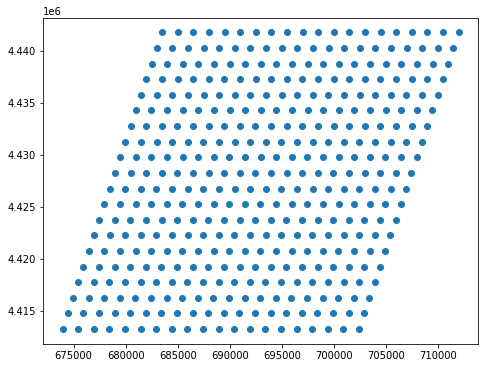

In [3]:
grid = Grid(n_rows=20, n_cols=20, x_shear=20, origin=(areas[0].centroid.x, areas[0].centroid.y), scale=250)
layout = Layout(grid)
layout.plot()

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

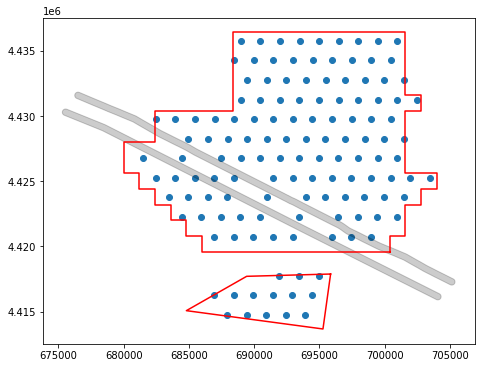

In [4]:
layout.clip_to_area(areas)
layout.avoid_exclusions(exclusions)
layout.plot()

In [ ]:
grid = Grid(n_rows=20, n_cols=20, x_shear=20, origin=(area.centroid.x, area.centroid.y), scale=250)
grid_geom = grid.to_multipoint()
#mooring_buffer = area.intersection(area.exterior.buffer(500))

layout = grid_geom.intersection(area)
for geom in exclusions:
    layout = layout.difference(geom)
#layout = layout.difference(mooring_buffer)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
grid.plot(ax=ax)
#ax.plot(*area.exterior.xy, 'r')
#ax.plot(*area.interiors[0].xy, 'r')
for geom in layout.geoms:
    ax.scatter(*geom.xy, c='g')
for geom in exclusions:
    ax.fill(*geom.exterior.xy, color='black', alpha=0.6)
gpd.GeoSeries(area).plot(ax=ax, color='r', alpha=0.1)

In [ ]:
grids = []
layouts = []

for row_step in np.arange(5, 10, 0.5):
    for col_step in np.arange(5, 10, 0.5):
        for angle in np.arange(0, 90, 10):
            for x_shear in np.arange(0, 30, 5):
                grid = Grid(n_cols=20, n_rows=20, row_step=row_step, col_step=col_step, angle=angle, x_shear=x_shear, scale=250, origin=(area.centroid.x, area.centroid.y))
                layout = area.intersection(MultiPoint(grid.coords))
                layouts.append(layout)
                grids.append(grid)

In [ ]:
from shapely.geometry import Point
from shapely.ops import unary_union
polygons = [Point(i, 0).buffer(0.7) for i in range(5)]
type(unary_union(polygons))

In [ ]:
type(plt.Figure())

In [ ]:
areas = unary_union([Point(5, 5), Point(10, 10)])
type(areas)

In [ ]:
area = Polygon([(0, 0), (0, 1), (1, 1)])
area.exterior.xy